# Dimention Reduction

## Jorge Alberto Padilla Gutierrez

# Imports

In [1]:
from umap import UMAP
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Feature Engineering

In [2]:
data = pd.read_csv('penguins.csv')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
data['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [4]:
# Test: dropnan
data = data.dropna()
data = data.reset_index()
data = data.drop('index', axis=1)

In [5]:
data = pd.concat([data,pd.get_dummies(data['island'])], axis=1)
data['Torgersen'] = data['Torgersen'].astype(int)
data['Biscoe'] = data['Biscoe'].astype(int)
data['Dream'] = data['Dream'].astype(int)
data = data.drop(['island'], axis=1)

In [6]:
data = pd.concat([data,pd.get_dummies(data['sex'])], axis=1)
data['male'] = data['male'].astype(int)
data['female'] = data['female'].astype(int)
data = data.drop(['sex'], axis=1)

In [7]:
minmax = MinMaxScaler()

data['bill_length_mm'] = data['bill_length_mm'].fillna(0.0)
data['bill_length_mm'] = pd.DataFrame(minmax.fit_transform((data['bill_length_mm'].to_numpy()).reshape(-1,1)))

In [8]:
data['bill_depth_mm'] = data['bill_depth_mm'].fillna(0.0)
data['bill_depth_mm'] = data['bill_depth_mm'].fillna(0.0)
data['bill_depth_mm'] = pd.DataFrame(minmax.fit_transform((data['bill_depth_mm'].to_numpy()).reshape(-1,1)))

In [9]:
data['flipper_length_mm'] = data['flipper_length_mm'].fillna(0.0)
data['flipper_length_mm'] = data['flipper_length_mm'].fillna(0.0)
data['flipper_length_mm'] = pd.DataFrame(minmax.fit_transform((data['flipper_length_mm'].to_numpy()).reshape(-1,1)))

In [10]:
data['body_mass_g'] = data['body_mass_g'].fillna(0.0)
data['body_mass_g'] = data['body_mass_g'].fillna(0.0)
data['body_mass_g'] = pd.DataFrame(minmax.fit_transform((data['body_mass_g'].to_numpy()).reshape(-1,1)))

In [11]:
data['year'] = data['year'].fillna(0.0)
data['year'] = data['year'].fillna(0.0)
data['year'] = pd.DataFrame(minmax.fit_transform((data['year'].to_numpy()).reshape(-1,1)))
print(data)

       species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0       Adelie        0.254545       0.666667           0.152542     0.291667   
1       Adelie        0.269091       0.511905           0.237288     0.305556   
2       Adelie        0.298182       0.583333           0.389831     0.152778   
3       Adelie        0.167273       0.738095           0.355932     0.208333   
4       Adelie        0.261818       0.892857           0.305085     0.263889   
..         ...             ...            ...                ...          ...   
328  Chinstrap        0.861818       0.797619           0.593220     0.361111   
329  Chinstrap        0.414545       0.595238           0.508475     0.194444   
330  Chinstrap        0.636364       0.607143           0.355932     0.298611   
331  Chinstrap        0.680000       0.702381           0.644068     0.388889   
332  Chinstrap        0.658182       0.666667           0.440678     0.298611   

     year  Biscoe  Dream  T

In [12]:
X = np.array(data.drop(['species'], axis=1))
print(X)
print(X.shape)

[[0.25454545 0.66666667 0.15254237 ... 1.         0.         1.        ]
 [0.26909091 0.51190476 0.23728814 ... 1.         1.         0.        ]
 [0.29818182 0.58333333 0.38983051 ... 1.         1.         0.        ]
 ...
 [0.63636364 0.60714286 0.3559322  ... 0.         0.         1.        ]
 [0.68       0.70238095 0.6440678  ... 0.         0.         1.        ]
 [0.65818182 0.66666667 0.44067797 ... 0.         1.         0.        ]]
(333, 10)


In [13]:
le = LabelEncoder()
le.fit(data['species'])
y = le.transform(data['species'])
print(y)
print(y.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
(333,)


Text(0, 0.5, 'species')

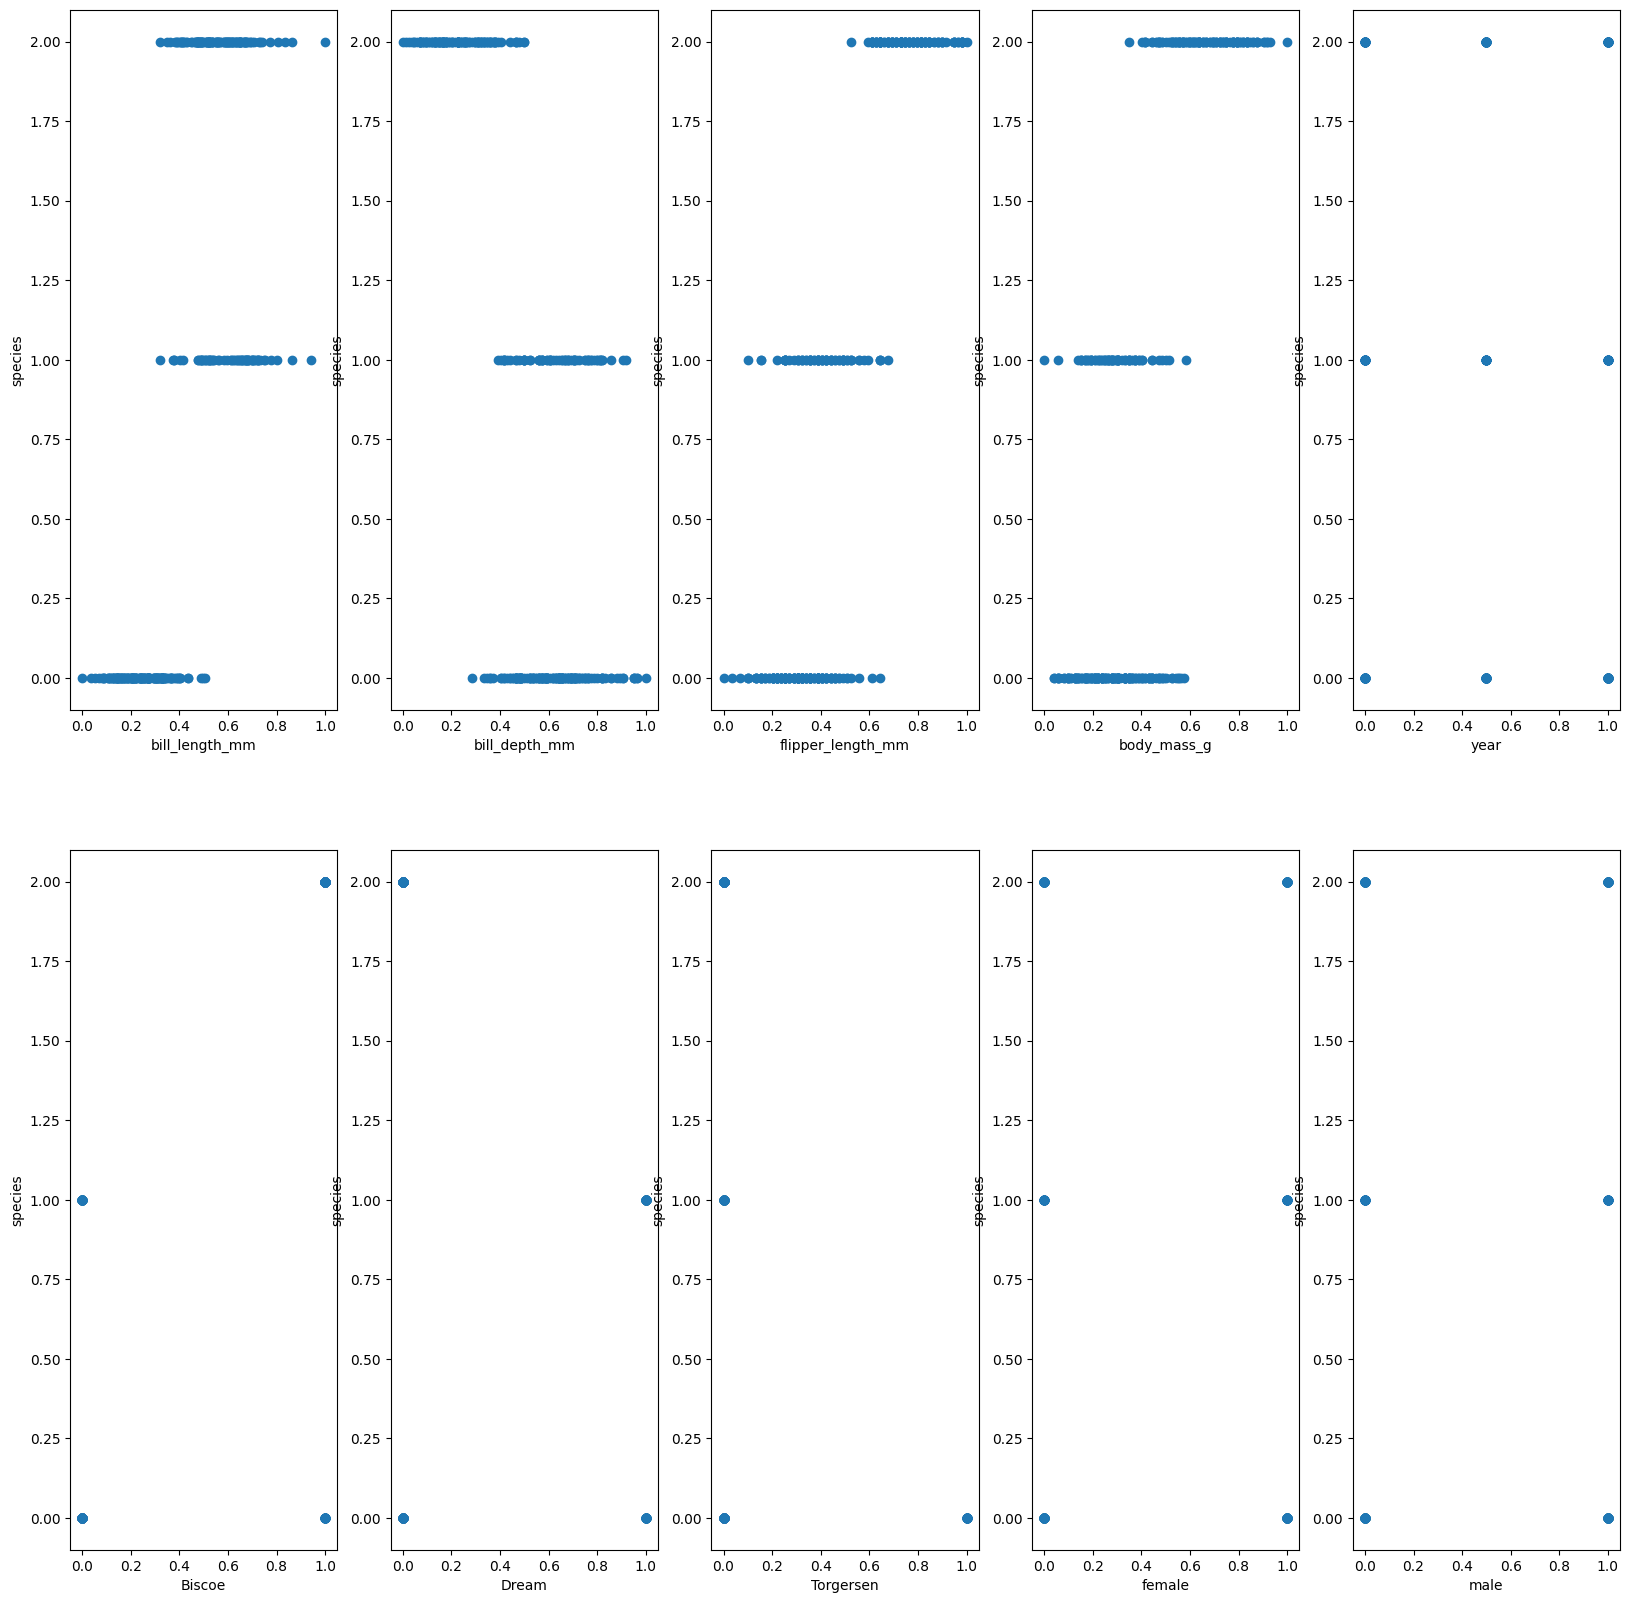

In [14]:
plt.figure(figsize=(20,20))
plt.subplot(2,5,1)
plt.scatter(X[:,0],y)
plt.xlabel('bill_length_mm')
plt.ylabel('species')
plt.subplot(2,5,2)
plt.scatter(X[:,1],y)
plt.xlabel('bill_depth_mm')
plt.ylabel('species')
plt.subplot(2,5,3)
plt.scatter(X[:,2],y)
plt.xlabel('flipper_length_mm')
plt.ylabel('species')
plt.subplot(2,5,4)
plt.scatter(X[:,3],y)
plt.xlabel('body_mass_g')
plt.ylabel('species')
plt.subplot(2,5,5)
plt.scatter(X[:,4],y)
plt.xlabel('year')
plt.ylabel('species')
plt.subplot(2,5,6)
plt.scatter(X[:,5],y)
plt.xlabel('Biscoe')
plt.ylabel('species')
plt.subplot(2,5,7)
plt.scatter(X[:,6],y)
plt.xlabel('Dream')
plt.ylabel('species')
plt.subplot(2,5,8)
plt.scatter(X[:,7],y)
plt.xlabel('Torgersen')
plt.ylabel('species')
plt.subplot(2,5,9)
plt.scatter(X[:,8],y)
plt.xlabel('female')
plt.ylabel('species')
plt.subplot(2,5,10)
plt.scatter(X[:,9],y)
plt.xlabel('male')
plt.ylabel('species')

In [30]:
pca_2 = PCA(n_components=2, random_state=42)
tsne_2 = TSNE(n_components=2, n_iter_without_progress=10000, perplexity=300, early_exaggeration=100.0, random_state=42)
umap_2 = UMAP(n_components=2, n_neighbors=300, min_dist=0.1, random_state=42)
pca_3 = PCA(n_components=3, random_state=42)
tsne_3 = TSNE(n_components=3, n_iter_without_progress=1000000, perplexity=300, early_exaggeration=10000.0, random_state=42)
umap_3 = UMAP(n_components=3, n_neighbors=300, min_dist=0.5, random_state=42)

In [31]:
X_pca_2 = pca_2.fit_transform(X)
X_tsne_2 = tsne_2.fit_transform(X)
X_umap_2 = umap_2.fit_transform(X)
X_pca_3 = pca_3.fit_transform(X)
X_tsne_3 = tsne_3.fit_transform(X)
X_umap_3 = umap_3.fit_transform(X)

c:\Users\japadill\AppData\Local\anaconda3\envs\iteso2024\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
c:\Users\japadill\AppData\Local\anaconda3\envs\iteso2024\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


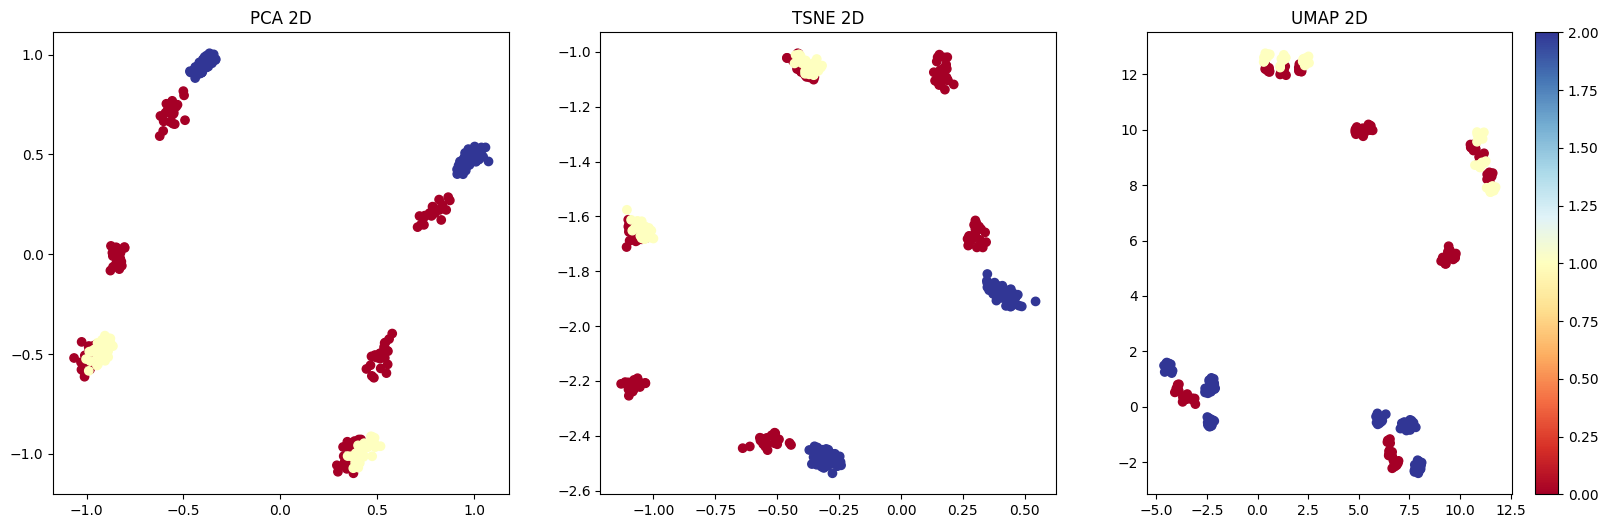

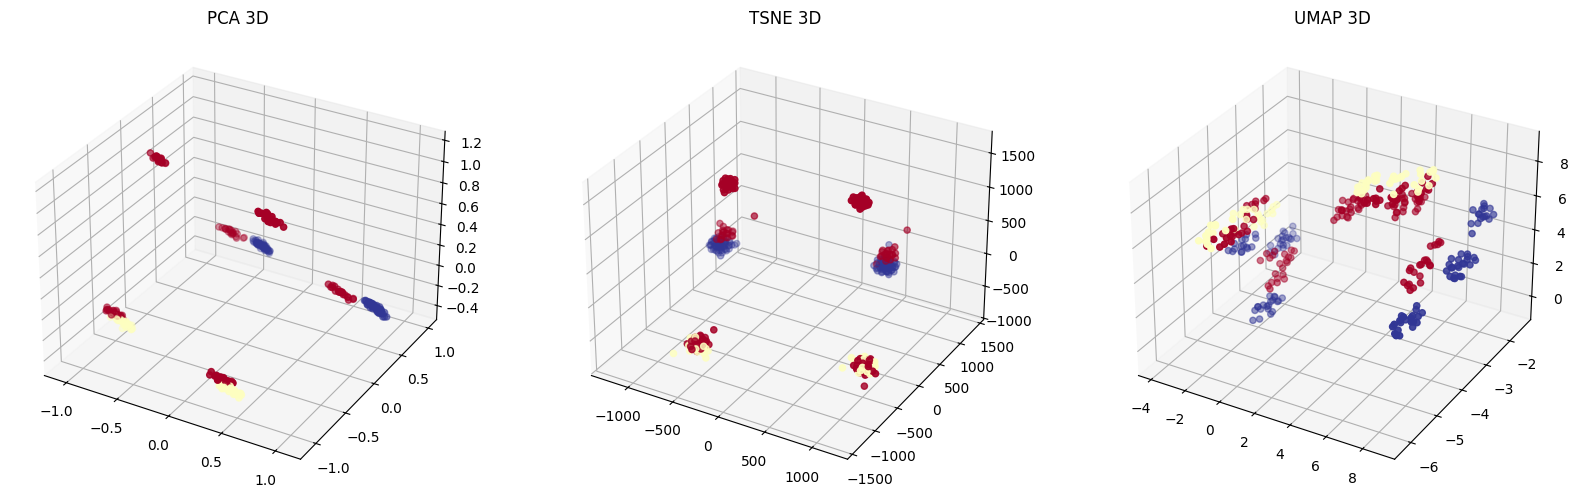

In [32]:
fig, ax = plt.subplots(1,3,figsize=(20,6))
plots = [X_pca_2,X_tsne_2,X_umap_2]
names = ['PCA 2D','TSNE 2D','UMAP 2D']
i = 0
for x in ax.flat:
    im = x.scatter(plots[i][:, 0], plots[i][:, 1], c=y, cmap='RdYlBu')
    x.set_title(names[i])
    i = i+1

fig.colorbar(im, ax=ax[2])

fig = plt.figure(figsize=(20,6))
plots = [X_pca_3,X_tsne_3,X_umap_3]
names = ['PCA 3D','TSNE 3D','UMAP 3D']
i = 0
for x in range(1,4):
    ax = fig.add_subplot(1,3,x, projection='3d')
    ax.scatter(plots[i][:, 0], plots[i][:, 1], plots[i][:, 2],c=y, cmap='RdYlBu')
    ax.set_title(names[i])
    i = i + 1


# Results

PCA seems to be the most consistent of all 3, on 2D we can easilly reduce a dimension again and labels of value 2 and 1 can be identified correctly while label value 0 can also be matching with 1

TSNE is also a great contender since after tunning is almost similar to PCA but it required harder work finding the "hyperparameters"

Lastrly UMAP is able to segmentate almost as good as the others but it makes more clusters of the same lable than the other reduction methods